In [1]:
include("util_summation.jl")

# Number of exact digits

The number of exact digits of a quantity $x$ is defined as:

\begin{align}
\sigma_q = -log_{10}\left\vert\frac{q_{float}-q_{exact}}{q_{exact}}\right\vert
\end{align}

In [2]:
# inp: input data
# fun: computation
# ref: exact result
# T:   number type
function reliable_digits(inp, fun, ref::T) where T
    res = fun(T.(inp))
    err = abs((ref-res)/ref)
    max(-log10(err), 0)
end

reliable_digits (generic function with 1 method)

For an ill-conditioned sum (condition number $\simeq10^8$), we expect to lose approximately 8 significant decimal digits. Starting from a maximum of 16 decimal digits for 64-bit floating-point numbers, 8 digits should remain reliable.

In [3]:
cond, ref, x = read_data("dataSum/data00030.dat");
(cond, ref, sum(x))

(3.61e8, 0.7925604332764857, 0.7925604358315589)

In [4]:
reliable_digits(x, sum, ref)

8.491629048682006

Starting from a maximum of 7 decimal digits for 32-bit FP numbers, no digit should remain reliable.

In [5]:
reliable_digits(x, sum, Float32(ref))

0.0f0

Let's try this on a large amount of data, with ever more ill-conditioned summations. All vectors have length 100.

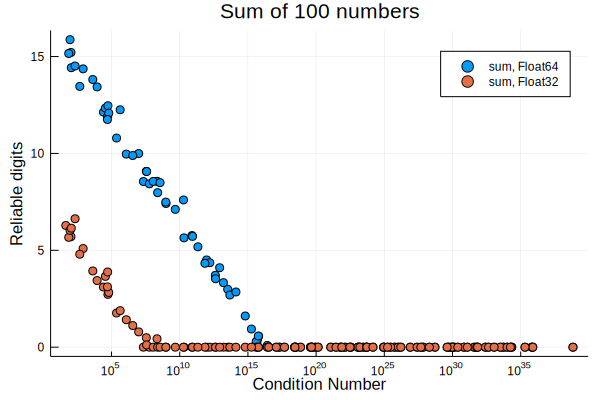

In [6]:
plot()
title!("Sum of 100 numbers");
xaxis!("Condition Number", :log10);
yaxis!("Reliable digits");

test(sum, Float64)
test(sum, Float32)

# Stochastic Arithmetic

In [7]:
using StochasticArithmetic

@reliable_digits sum(SFloat64.(x))

(0.7925603437237919, 7.435406502594489)

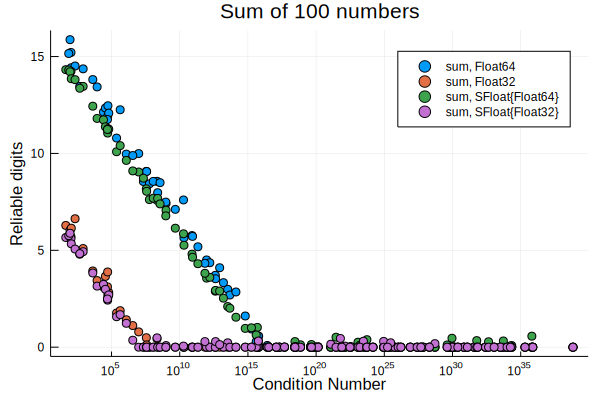

In [8]:
using StochasticArithmetic: SFloat

# inp: input data
# fun: computation
# T:   number type (stochastic)
function reliable_digits(inp, fun, ::T) where {T<:SFloat}
    _, s = @reliable_digits fun(T.(inp))
    max(s, 0)
end

test(sum, SFloat64)
test(sum, SFloat32)